In [160]:
import numpy as np
import pandas as pd 
from plotnine import *
import matplotlib.pyplot as plt
import os
%matplotlib inline 

In [161]:
Ruta_Mati='/Users/matiaslopezportius/Desktop/UAI 2020/Analisis Predictivo/Prueba/Data'
sales_train = pd.read_csv(Ruta_Mati+'/{file}'.format(file='sales_train.csv.gz'),encoding="latin_1",sep=",")
shops = pd.read_csv(os.path.join(Ruta_Mati, 'shops.csv'))
items = pd.read_csv(os.path.join(Ruta_Mati, 'items.csv'))
item_cats = pd.read_csv(os.path.join(Ruta_Mati, 'item_categories.csv'))


In [162]:
print('                        (numero de filas, numero de columnas)')
print('training set          : ', sales_train.shape)
print('num of shops          : ', shops.shape)
print('num of items          : ',items.shape)
print('num of item categories: ',item_cats.shape)

                        (numero de filas, numero de columnas)
training set          :  (2935849, 6)
num of shops          :  (60, 2)
num of items          :  (22170, 3)
num of item categories:  (84, 2)


In [163]:
# Nombre de los atributos de cada data
print("Indices sales: ",sales_train.columns)
print("Indices shops: ",shops.columns)
print("Indices items: ",items.columns)
print("Indices cats : ",item_cats.columns)

Indices sales:  Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')
Indices shops:  Index(['shop_name', 'shop_id'], dtype='object')
Indices items:  Index(['item_name', 'item_id', 'item_category_id'], dtype='object')
Indices cats :  Index(['item_category_name', 'item_category_id'], dtype='object')


In [164]:
data=pd.merge(sales_train,shops,how='left',on='shop_id')
data=pd.merge(data,items,how='left',on='item_id')
data=pd.merge(data,item_cats,how='left',on='item_category_id')

In [165]:
def best_n(df,label,n):
    resumen = df.groupby(label)[label].count()
    aux1=list(resumen.sort_values(ascending=False).head(n).index)
    #aux2=list(resumen.sort_values(ascending=False).head(n))
    #lista=[aux1,aux2]
    lista=aux1
    return lista

def ConvertirTipoDato(df,column):
    df[column] = df[column].astype('category')
    return(df[column])   

In [166]:
best_50=best_n(data,'item_id',50)

In [167]:
temporal=data[data['item_id'] == best_50[0]].copy()
for i in range(1,len(best_50)):
    aux=data[data['item_id'] == best_50[i]].copy()
    temporal=pd.concat([temporal, aux], axis=0)
temporal.groupby('shop_id')['shop_id'].count().index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 56, 57, 58, 59],
           dtype='int64', name='shop_id')

In [168]:
data=temporal

In [169]:
data['date'] = pd.to_datetime(data['date'], format='%d.%m.%Y')#formato de fecha
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['day'] = data['date'].dt.day
data['weekday'] = data['date'].dt.weekday
data['weekday_name'] = data['date'].dt.day_name()
data['month_name'] = data['date'].dt.month_name()

In [170]:
data['shop_name'] = ConvertirTipoDato(data,'shop_name')
data['item_name'] = ConvertirTipoDato(data,'item_name')
data['item_category_name'] = ConvertirTipoDato(data,'item_category_name')
data['weekday_name'] = ConvertirTipoDato(data,'weekday_name')
data['month_name'] = ConvertirTipoDato(data,'month_name')
data["shop_id_categorico"]=data["shop_id"]
data['shop_id_categorico'] = ConvertirTipoDato(data,'shop_id_categorico')
data_con_outliers=data.copy()

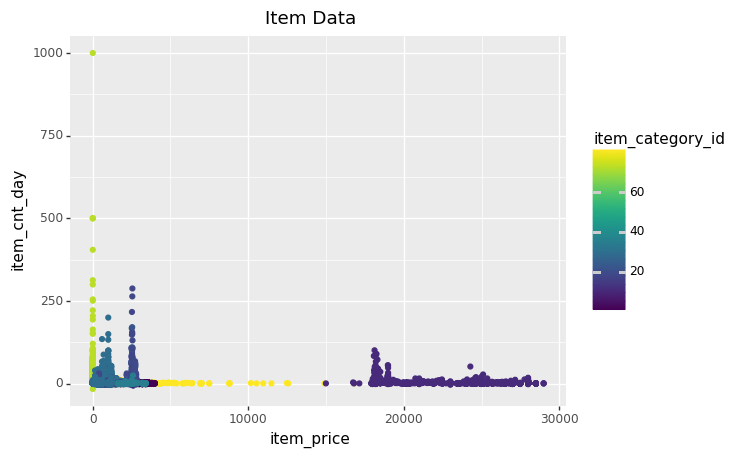

<ggplot: (347678749)>

In [171]:
g1= ggplot(data, aes(y = "item_cnt_day", x = "item_price", color="item_category_id"))\
+  ggtitle("Item Data") + geom_point()

g1

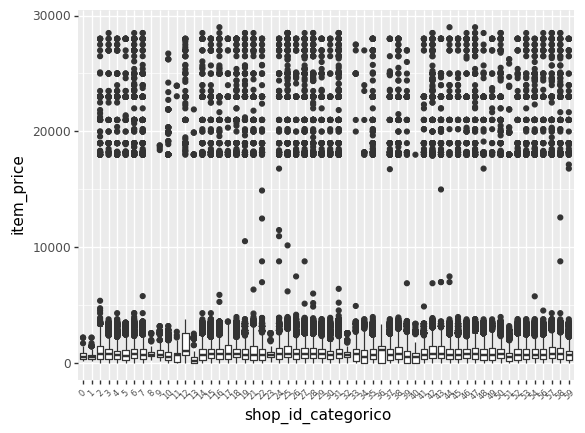

<ggplot: (347715145)>

In [172]:
g2= ggplot(data)\
+ geom_boxplot(aes(x='shop_id_categorico', y='item_price'))\
+ theme(axis_text_x=element_text(angle=45,size=6))
g2

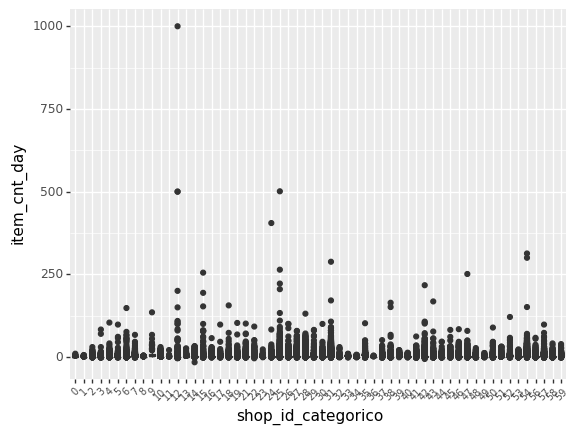

<ggplot: (344638737)>

In [173]:
g3= ggplot(data)\
+ geom_boxplot(aes(x='shop_id_categorico', y='item_cnt_day'))\
+ theme(axis_text_x=element_text(angle=45,size=7))
g3

In [174]:
tiendas=data.groupby('shop_id')['shop_id'].count().index
minimo=tiendas[0]
datos=data[data.shop_id == minimo]['item_cnt_day'].describe()
print(datos)
q3=data[data.shop_id == minimo]['item_cnt_day'].describe().values[6]
q1=data[data.shop_id == minimo]['item_cnt_day'].describe().values[4]
IQR=q3-q1 
outlier_sup=q3+3*IQR
outlier_inf=q1-3*IQR
print(outlier_sup,outlier_sup)
data_sin_Outliers=data[data.shop_id == minimo][data.item_cnt_day>=outlier_inf][data.item_cnt_day<=outlier_sup].copy()
tiendas=np.delete(tiendas, 0)
print(tiendas)
for i in tiendas:
    datos=data[data.shop_id == i]['item_cnt_day'].describe()
    q3=datos.values[6]
    q1=datos.values[4]
    IQR=q3-q1 
    outlier_sup=q3+3*IQR
    outlier_inf=q1-3*IQR
    aux=data[data.shop_id == i][data.item_cnt_day>=outlier_inf][data.item_cnt_day<=outlier_sup].copy()
    data_sin_Outliers=pd.concat([data_sin_Outliers, aux], axis=0)

count    383.000000
mean       1.375979
std        0.840498
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: item_cnt_day, dtype: float64
5.0 5.0
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
            36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
            53, 54, 56, 57, 58, 59],
           dtype='int64', name='shop_id')


/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/

/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/

/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/

In [175]:
data_sin_Outliers.shape

(239130, 17)

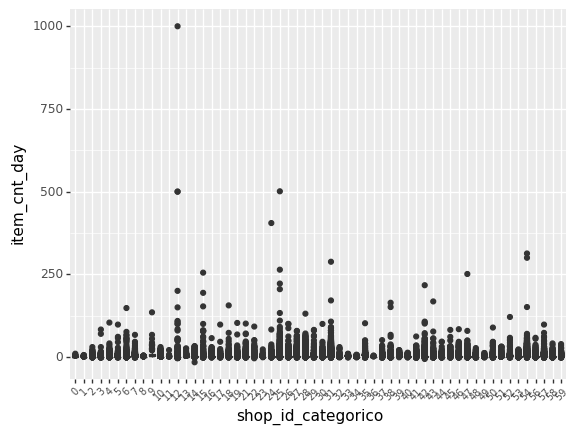

<ggplot: (344606997)>

In [176]:
g4=ggplot(data)\
+ geom_boxplot(aes(x='shop_id_categorico', y='item_cnt_day'))\
+ theme(axis_text_x=element_text(angle=45,size=7))
g4

In [177]:
tiendas=data.groupby('shop_id_categorico')['shop_id_categorico'].count().index
minimo=tiendas[0]
datos=data_sin_Outliers[data_sin_Outliers.shop_id_categorico == minimo]['item_price'].describe()
q3=datos.values[6]
q1=datos.values[4]
IQR=q3-q1 
outlier_sup=q3+3*IQR
outlier_inf=q1-3*IQR
data=data_sin_Outliers[data_sin_Outliers.shop_id_categorico == minimo][data_sin_Outliers.item_price>=outlier_inf][data_sin_Outliers.item_price<=outlier_sup].copy()
tiendas=np.delete(tiendas, 0)
for i in tiendas:
    datos=data_sin_Outliers[data_sin_Outliers.shop_id_categorico == i]['item_price'].describe()
    q3=datos.values[6]
    q1=datos.values[4]
    IQR=q3-q1 
    outlier_sup=q3+3*IQR
    outlier_inf=q1-3*IQR
    aux=data_sin_Outliers[data_sin_Outliers.shop_id_categorico == i][data_sin_Outliers.item_price>=outlier_inf][data_sin_Outliers.item_price<=outlier_sup].copy()
    data=pd.concat([data, aux], axis=0)

/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/en

/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/

/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/matiaslopezportius/opt/anaconda3/

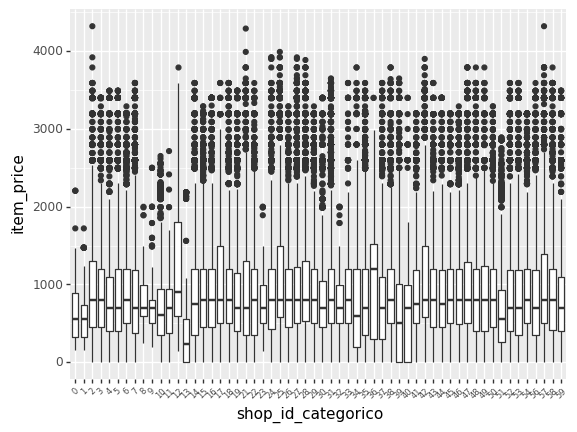

<ggplot: (348036885)>

In [178]:
g5=ggplot(data)\
+ geom_boxplot(aes(x='shop_id_categorico', y='item_price'))\
+ theme(axis_text_x=element_text(angle=45,size=6))
g5

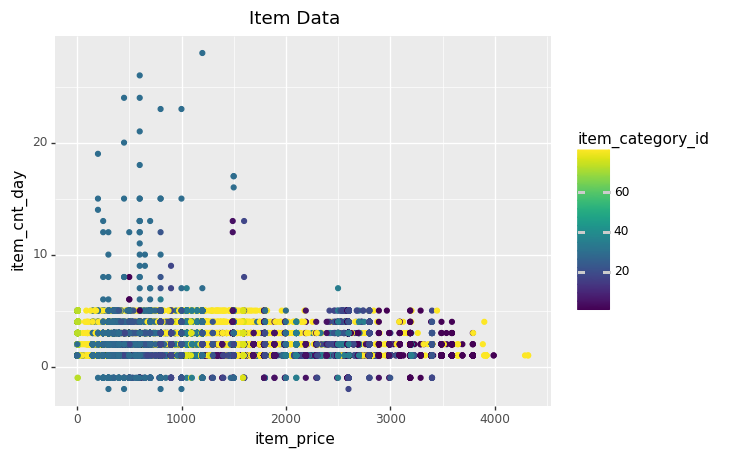

<ggplot: (348855781)>

In [179]:
g6=ggplot(data, aes(y = "item_cnt_day", x = "item_price", color="item_category_id"))\
+  ggtitle("Item Data") + geom_point()
g6

In [182]:
ggsave(g1, "Graficos/g1.png")
ggsave(g2, "Graficos/g2.png")
ggsave(g3, "Graficos/g3.png")
ggsave(g4, "Graficos/g4.png")
ggsave(g5, "Graficos/g5.png")
ggsave(g6, "Graficos/g6.png")

print('Data inicial                                                   :', data_con_outliers.shape)
print('Data despues de detección Outliers en cada tienda por cantidad :', data_sin_Outliers.shape)
print('Data despues de detección Outliers en cada tienda por precio   :', data.shape)

/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Graficos/g1.png
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Graficos/g2.png
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Learning/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Graficos/g3.png
/Users/matiaslopezportius/opt/anaconda3/envs/Machine_Le

Data inicial                                                   : (264494, 17)
Data despues de detección Outliers en cada tienda por cantidad : (239130, 17)
Data despues de detección Outliers en cada tienda por precio   : (233770, 17)


In [183]:
data.to_csv('Data_sin_Outliers/data')